<h1>Classification of Palmer Penguins using differnet classification techniques<h1>

##Aim
We classify the three types of penguins found close to Palmer station in Antartica using these classification techniques:


* Support Vector Machine
* Neural Network
* Decision Tree
* Quadratic Discriminant Analysis
* Random Forest
* K-Nearest Neighbour
* Gradient Boosted Decision Tree


In [ ]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Data Description##
The data we are using contains the size measurements, clutch observations, and blood isotope ratios for 344 adult foraging Adélie, Chinstrap, and Gentoo penguins observed on islands in the Palmer Archipelago near Palmer Station, Antarctica. Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica Long Term Ecological Research (LTER) Pro. The features we'll see in the data set are: 

**species** - Species of Penguin(Adélie, Chinstrap or Gentoo) <br>
**island** -  Island from which the penguin was captured and measured<br>
**bill_length_mm** - Bill length of the penguin in mm<br>
**bill_depth_mm** - Bill depth of the penguin in mm<br>
**flipper_length_mm** - Flipper length of the penguin in mm<br>
**body_mass_g** - Body mass of the penguin in grams<br>
**sex** - Sex of penguin(Male or Female)<br>
**year** - year at which the measurements were taken<br>

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


##Missing values and Feature selection

In [ ]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

We see that there are 2 missing values in 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'(They are all numeric) and 11 missing values in 'sex'(it's categorical).

In [ ]:
penguins.isna().mean(axis=0)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
year                 0.000000
dtype: float64

The above code shows the proportion of missing values in each column.
Since the missing value proportion is so low for most columns, we're going to drop those rows with empty values.

In [ ]:
# Drop rows with missing values
penguins = penguins.dropna()
penguins = penguins.reset_index(drop=True)

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
penguins.shape

(333, 8)

Their sex and year of being measured does not help in predicting the species of the penguin so we can drop the columns: 'island', 'sex' and 'year', for our analysis.

##Creating the data set for the classiication

In [ ]:
y = penguins['species']
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

##Exploratory Data Analysis
Let's take a look at how each measurements are different for each species of penguin found in the Antartic Peninsula.

Setting up the graph colours 

In [ ]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

# Seaborn
penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8', 
    'Biscoe': '#94e2c3', 
    'Dream': '#345469',
    'Female': 'pink',
    'Male': 'skyblue',
}

# Matplotlib
pcolors =['#ff6602ff','#0f7175ff','#c65dc9ff']
icolors =['#955FC8', '#94e2c3', '#345469']
scolors =['pink','skyblue',]

plt_colors=[pcolors,icolors,scolors]

###Convert the data types

Number Adelie Penguins 146
Number of Gentoo penguins:  119
Number of Chinstrap penguins:  68


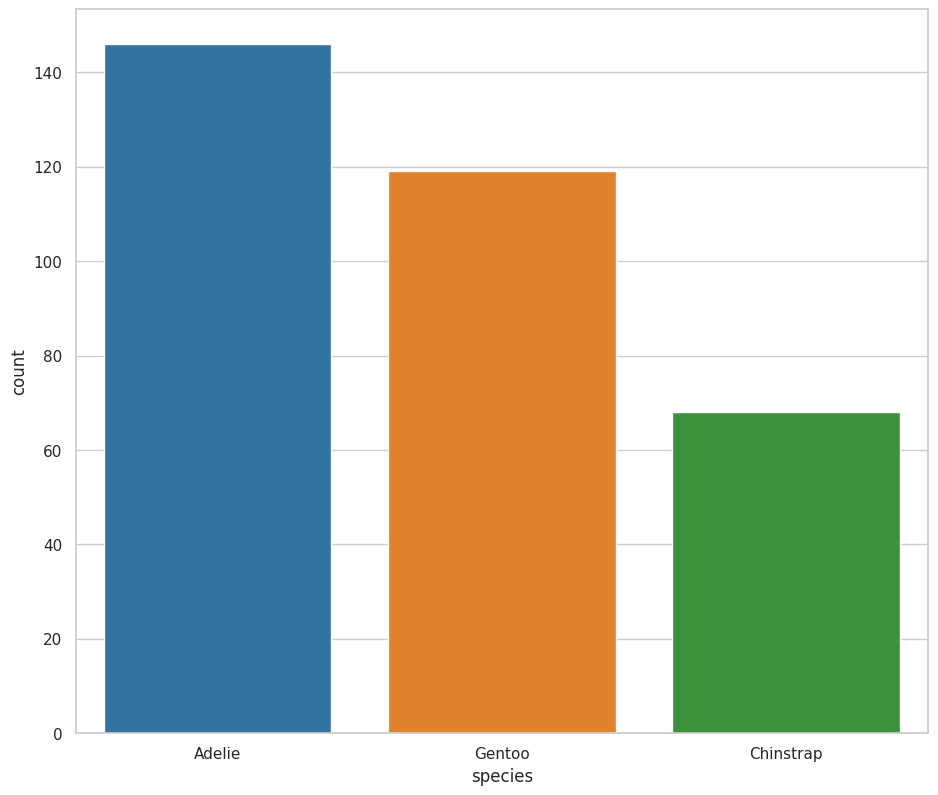

In [ ]:
ax = sns.countplot(x = y, label = 'Count')
nA, nC, nG = y.value_counts() 

print("Number Adelie Penguins", nA)
print("Number of Gentoo penguins: ", nC)
print("Number of Chinstrap penguins: ", nG) 

Changing the type of these variables into 'category'

In [ ]:
penguins = penguins.astype({'species': 'category','island': 'category','sex': 'category',}) 

In [ ]:
numeric_columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
category_columns = ['species', 'island']

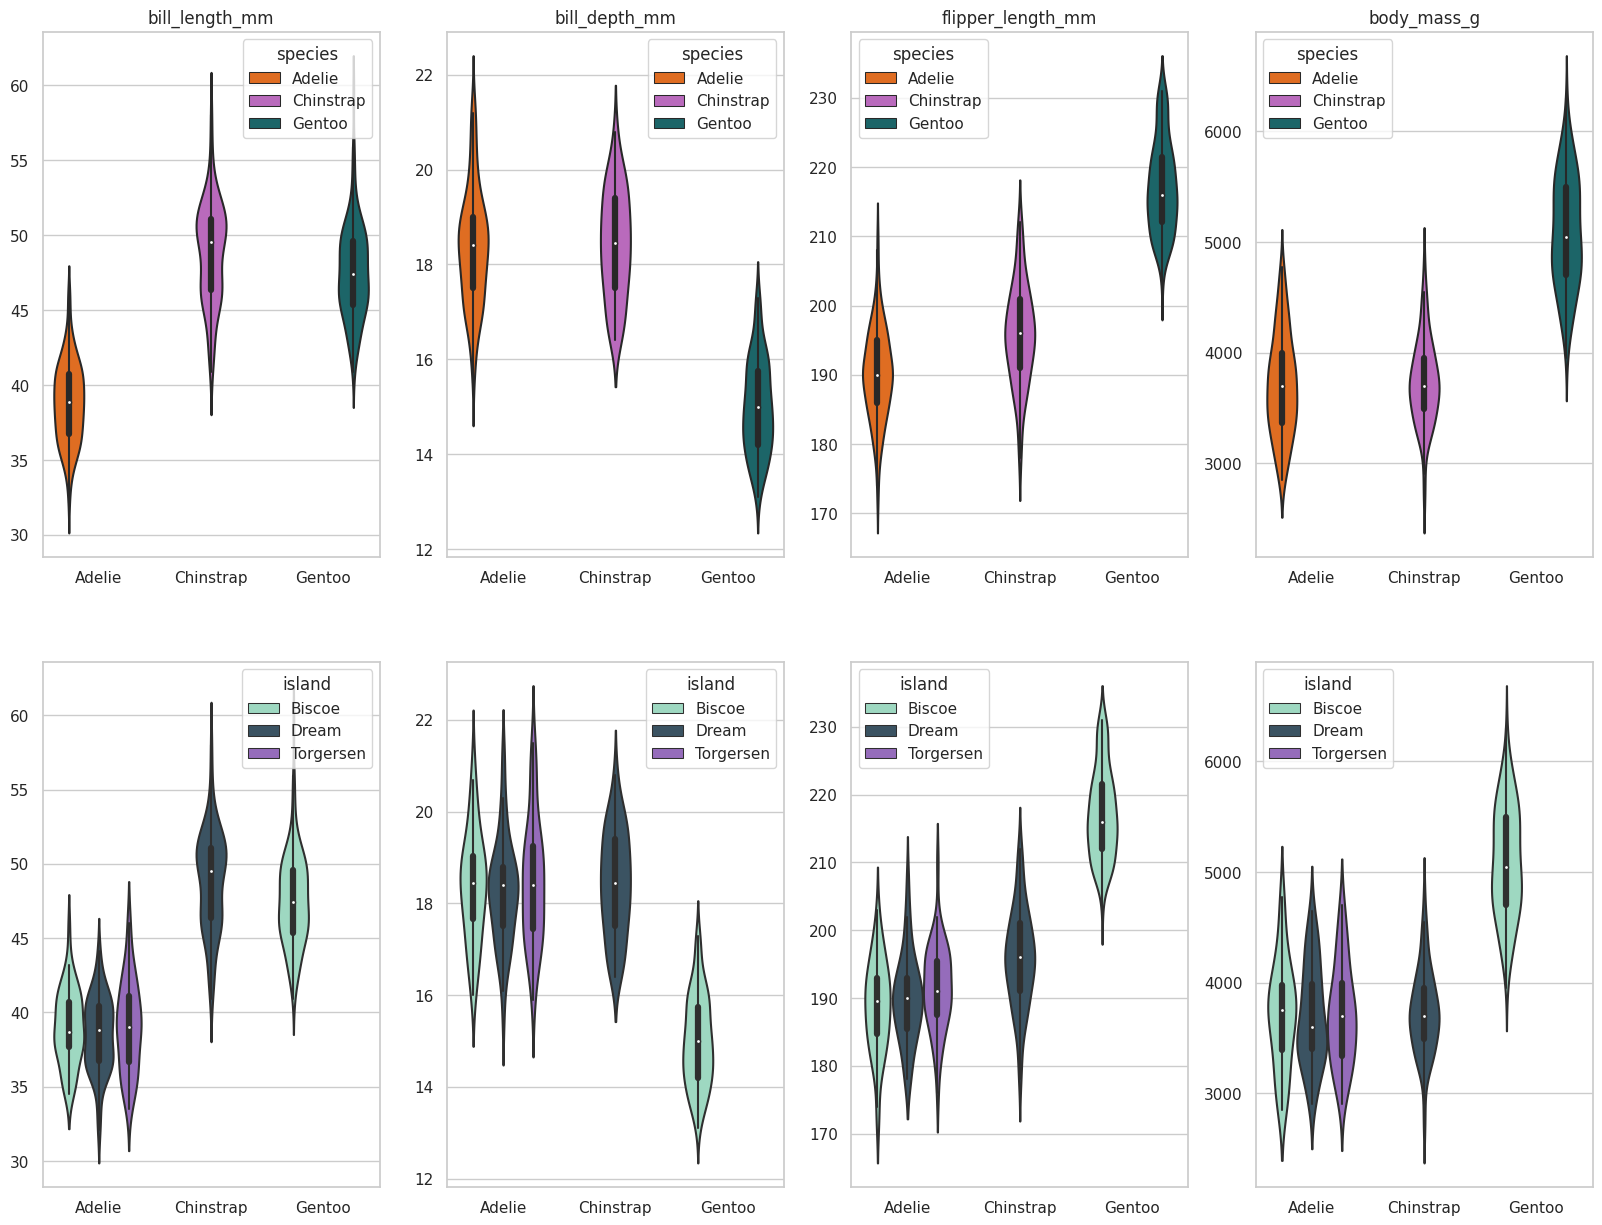

In [ ]:
fig,ax = plt.subplots(2,len(numeric_columns), figsize=(20,15))

for i, i_col in enumerate(category_columns):
    for j, j_col in enumerate(numeric_columns):
        sns.violinplot(
            split=True if i == 2 else False,
            ax=ax[i][j],
            data=penguins,
            x='species',
            y=j_col,
            hue=i_col,
            palette=penguin_color,
            )
        ax[i][j].set_title(j_col) if i ==0 else None
        ax[i][j].set_xlabel(None)
        ax[i][j].set_ylabel(None)

Text(0, 0.5, 'Body Mass')

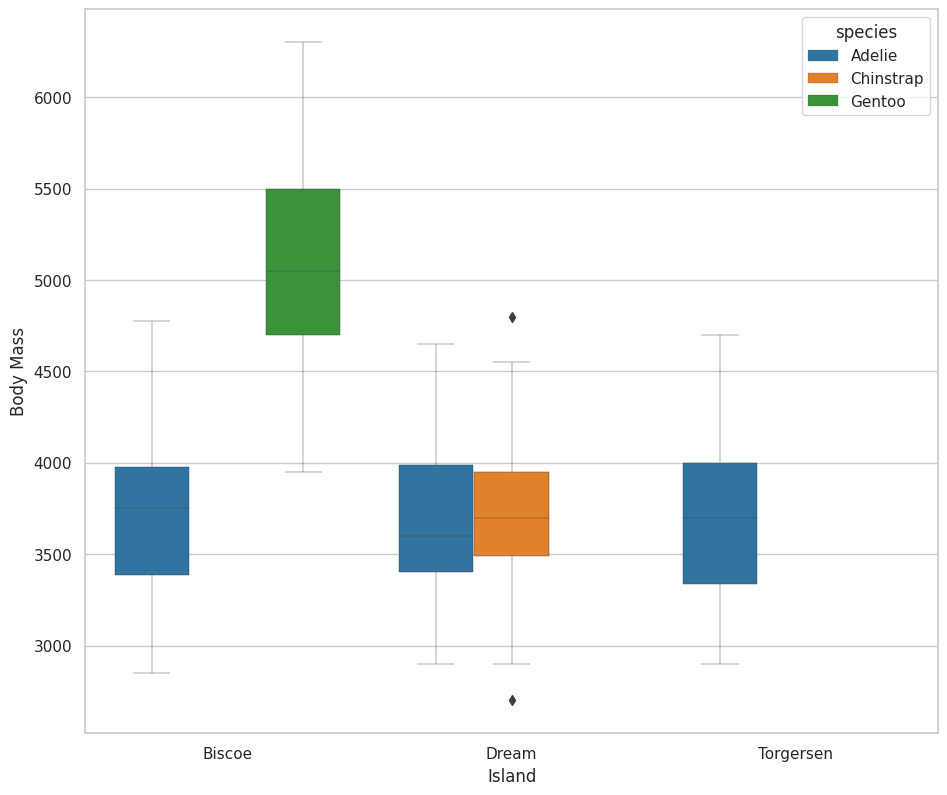

In [ ]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

##Classification and Comparison

You can also use the penguins dataset for training a machine learning model that can predict a penguin's species from its size measurements. `y` corresponds to the species variable and `X` includes the 4 size measurements variables.

Instead of applying each classification method separately and plotting them we used a Machine learning pipeline to make the program more neater. ML pipeline is constructed to allow the flow of data from raw data format to some valuable information. It provides a mechanism to build a Multi-ML parallel pipeline system to examine different ML methods' outcomes.

SVM accuracy: 0.98


<Figure size 1100x940 with 0 Axes>

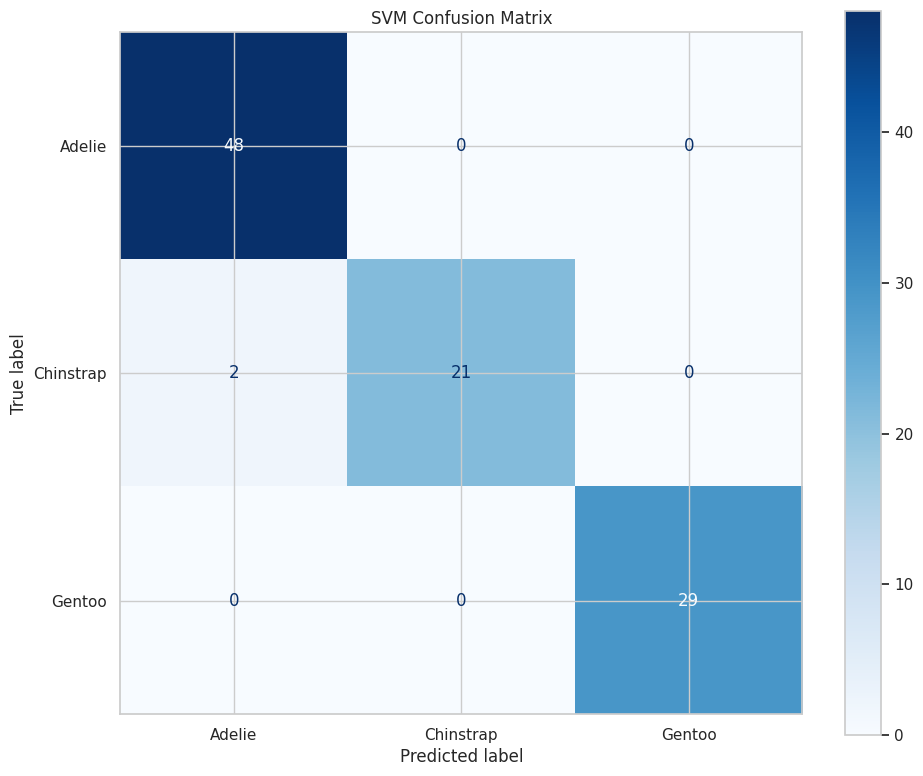

Neural Network accuracy: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1100x940 with 0 Axes>

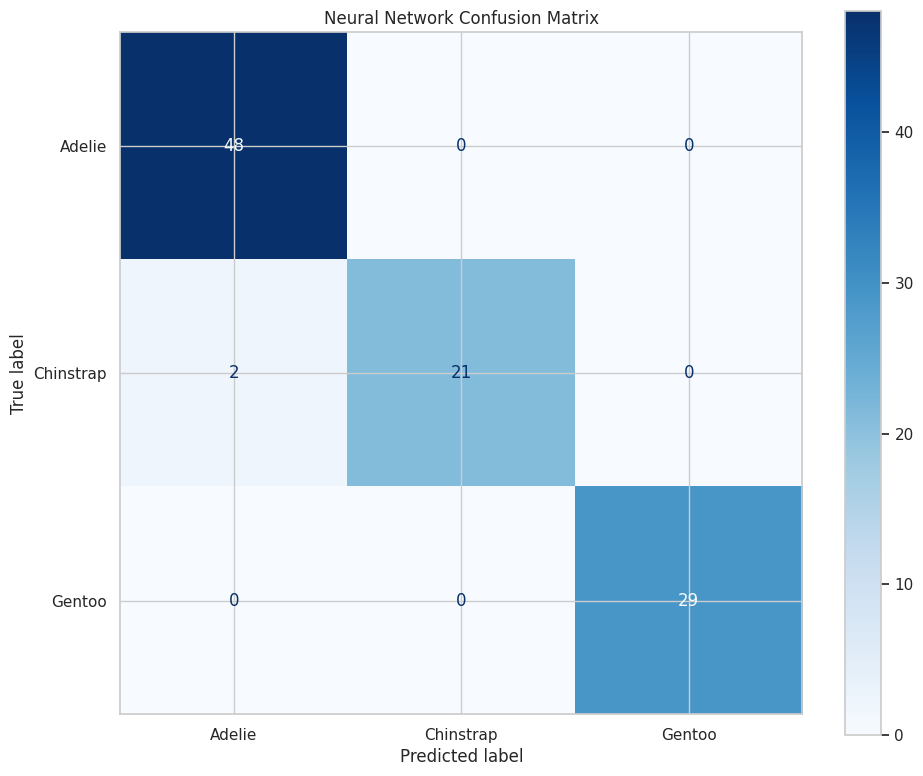

Decision Tree accuracy: 0.98


<Figure size 1100x940 with 0 Axes>

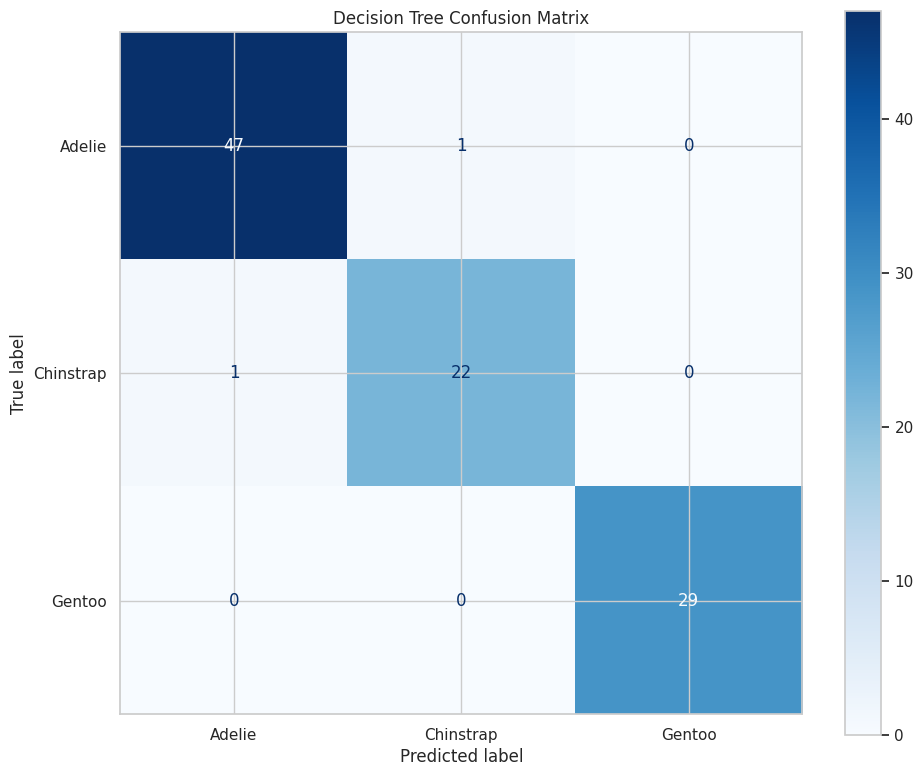

Quadratic Discriminant Analysis accuracy: 0.99


<Figure size 1100x940 with 0 Axes>

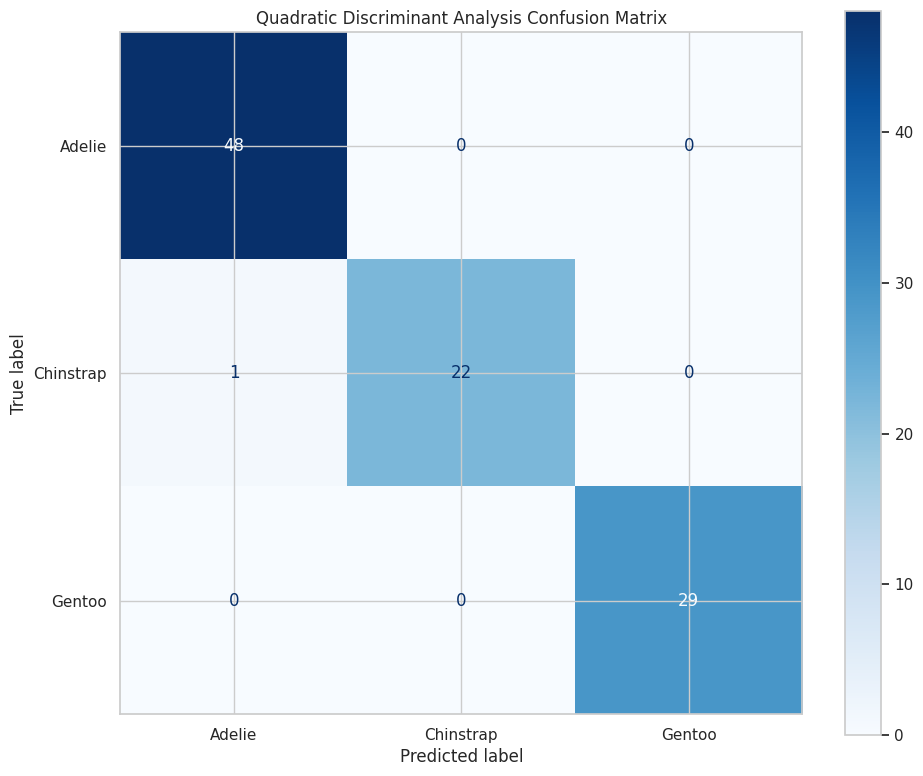

Random Forest accuracy: 0.97


<Figure size 1100x940 with 0 Axes>

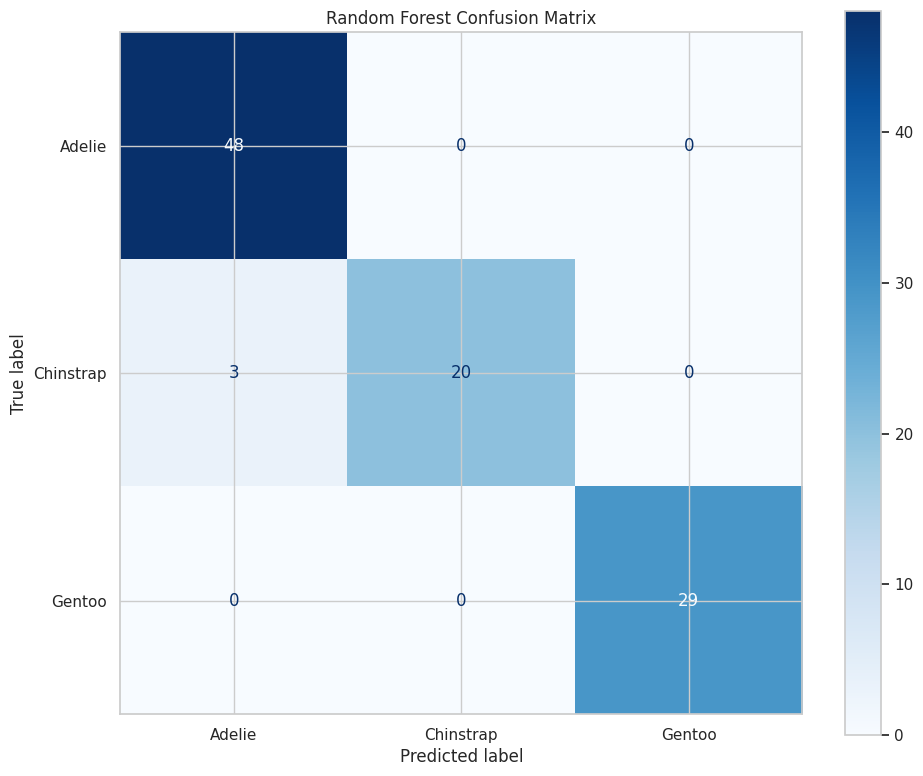

K-Nearest Neighbour accuracy: 0.98


<Figure size 1100x940 with 0 Axes>

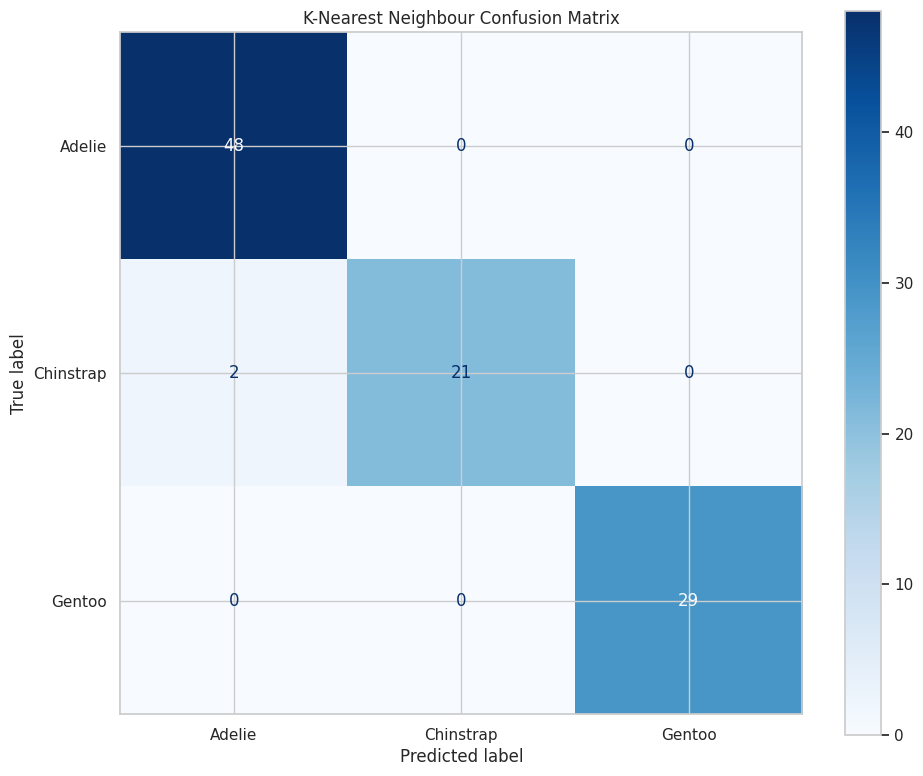

Gradient Boosted Decision Tree accuracy: 0.99


<Figure size 1100x940 with 0 Axes>

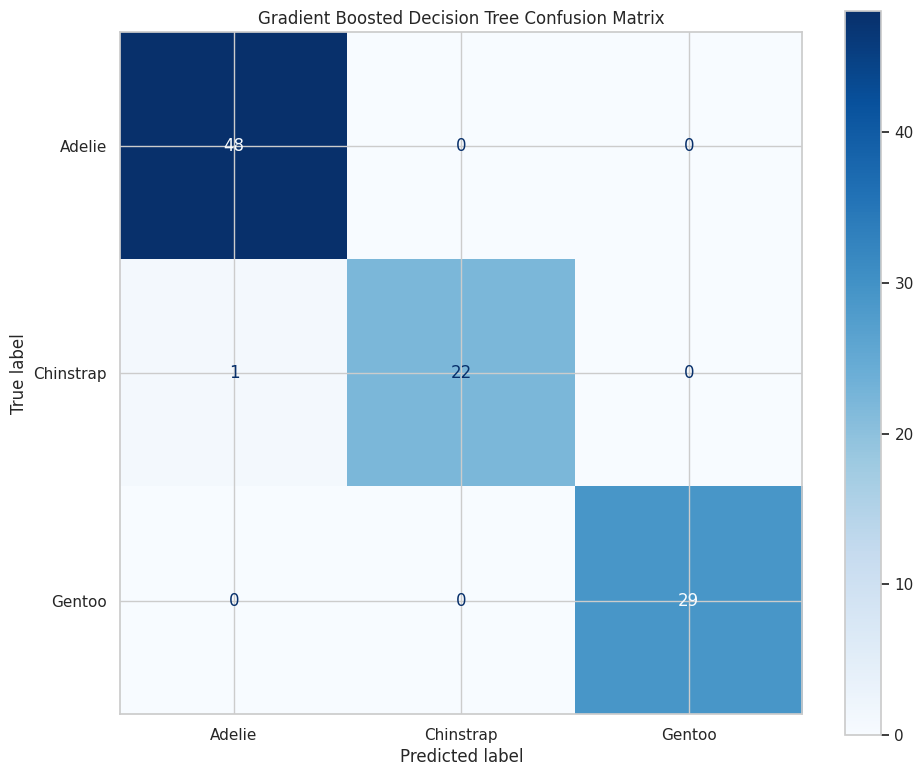

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = [
    ('SVM', SVC(kernel='linear')),
    ('Neural Network', MLPClassifier(hidden_layer_sizes=(100,))),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Quadratic Discriminant Analysis', QuadraticDiscriminantAnalysis()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbour', KNeighborsClassifier()),
    ('Gradient Boosted Decision Tree', GradientBoostingClassifier())
]

# Train and evaluate classifiers
for name, classifier in classifiers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, classifier)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name} accuracy: {score:.2f}")

    # Plot confusion matrix
    plt.figure()
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

##Conclusion
The accuracy of each classification method on the Palmers penguin data set is:
* Support Vector Machine - 98%
* Neural Network - 98%
* Decision Tree - 98%
* Quadratic Discriminant Analysis - 99%
* Random Forest - 97%
* K-Nearest Neighbour - 98%
* Gradient Boosted Decision Tree - 99%

